In [105]:
# Import Python Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import tree, datasets
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [106]:
# Load boston dataset
boston = datasets.load_boston() 
features = pd.DataFrame(boston.data, columns=boston.feature_names) 
targets = boston.target

In [107]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [108]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [110]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [111]:
# DataFrame using boston dataset features and target values
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = boston.target

In [112]:
# Statistical analysis of features in DataFrame df_x
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [113]:
# Data Preprocessing
# Function to handle missing data
def data_preprocessing(df):
    df.convert_objects(convert_numeric=True)
    df.fillna(0, inplace=True) 
    
    return df

In [114]:
# Function to handle categorical data
def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            
            x = 0            
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1                    
            df[column] = list(map(convert_to_int, df[column]))
            
    return df

In [115]:
# Perform data preprocessing on boston dataset
df_x = data_preprocessing(df_x)
df_x = handle_non_numeric_data(df_x)
df_x.head()

C:\Users\suruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [116]:
# Spliting boston dataset into test and traning dataset
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=5)

In [117]:
# Apply RandomForest Model on boston dataset

rfc1 = RandomForestRegressor(random_state=10)
rfc1.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [118]:
#Applying model by changing the max_features parameter
rfc2 = RandomForestRegressor(max_features=8, random_state=10)
rfc2.fit(x_train, y_train)

rfc3 = RandomForestRegressor(max_features=6, random_state=10)
rfc3.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=10,
           verbose=0, warm_start=False)

In [119]:
# Feature engineering
# Analyze features importance
rfc1.feature_importances_

array([0.04903067, 0.00108498, 0.00374297, 0.00511706, 0.00817035,
       0.34495785, 0.01275462, 0.08436785, 0.00822323, 0.01818498,
       0.0092608 , 0.00921063, 0.44589401])

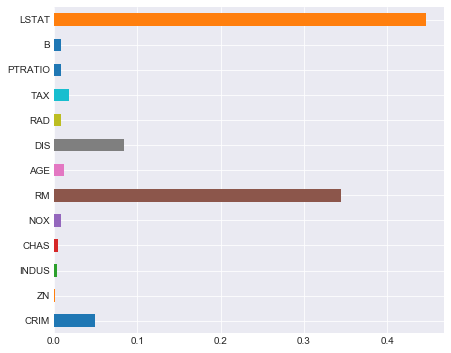

In [120]:
%matplotlib inline
feature_importances = pd.Series(rfc1.feature_importances_,index=df_x.columns)
feature_importances.plot(kind='barh',figsize=(7,6))

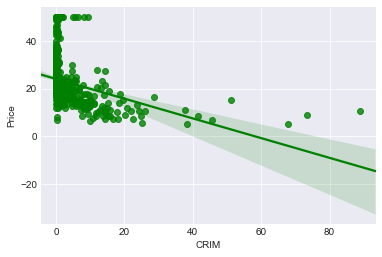

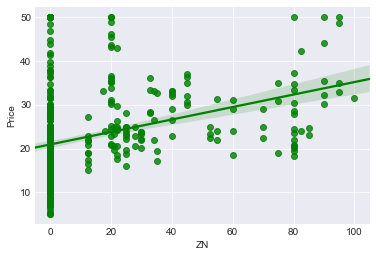

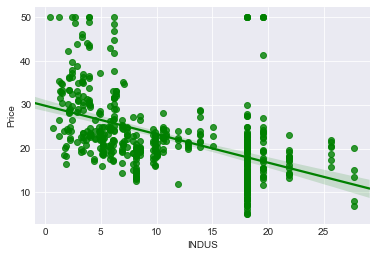

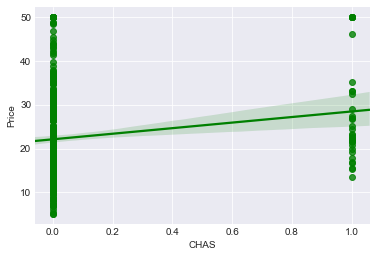

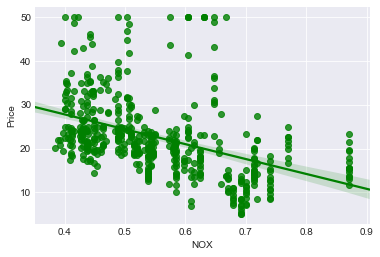

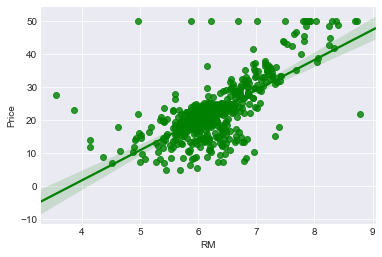

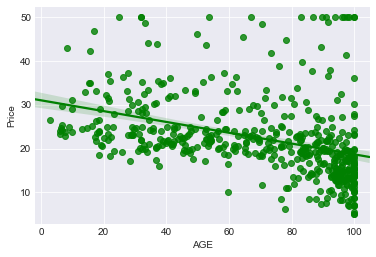

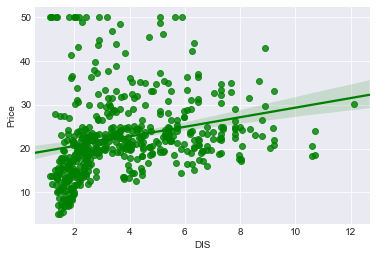

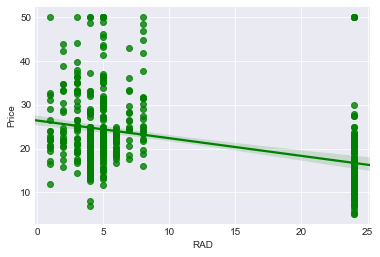

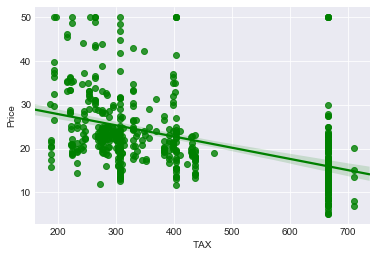

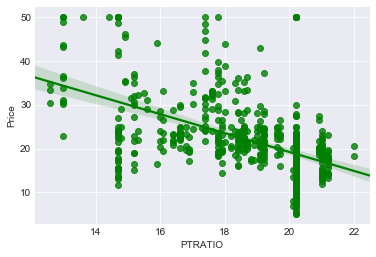

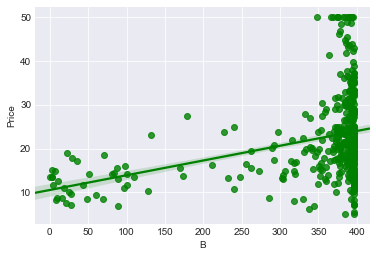

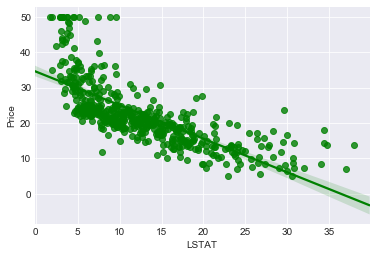

In [121]:
#Graph between features and target price
for var in boston.feature_names:
    sns.regplot(features[var], targets, color='g')
    plt.ylabel('Price')
    plt.show()

In [122]:
# Model Evaluation
# Model efficiency by considering all the parameters of boston dataset for analysis
pred1 = rfc1.predict(x_test)
# The mean squared error
print("Mean squared error: %f" % mean_squared_error(y_test, pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %f' % r2_score(y_test, pred1))

print("coefficient of determination R^2 of the prediction.:",pred1)

Mean squared error: 14.061522
Variance score: 0.820401
coefficient of determination R^2 of the prediction.: [47.62 29.03 22.41 12.24 40.56  7.01 25.15 27.12 24.94 19.37 33.64 19.96
 20.41 33.63 24.91 18.09 10.66 18.62 19.99 34.03 15.2  18.83 46.32 21.81
 29.03  9.21 24.11 20.22 23.75 27.1  15.91 14.75 11.85 18.96 23.65 20.08
 26.32  9.14 46.14 33.81 17.45 14.36 24.72 15.71 23.6  29.63  8.96 17.9
 19.21 14.99 19.49 21.   22.75 14.67 16.63 23.04 43.53 15.62 25.8  19.8
 19.93 21.8  15.73 31.05 21.1  10.89 19.46 25.03 21.82 21.14 15.14 23.84
 19.18 14.23 34.82 29.05 19.53 15.79 33.48 16.32 20.76 49.17 19.05 16.36
 21.35 14.97 19.35  8.54 20.13 20.92 41.8  18.51 19.44 15.82 23.46 25.77
 13.65 28.1  21.95 17.18 20.6  23.83]


In [123]:
# Model efficiency by considering n most important features (n=8) of boston dataset for analysis
pred2 = rfc2.predict(x_test)
# The mean squared error
print("Mean squared error: %f" % mean_squared_error(y_test, pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %f' % r2_score(y_test, pred2))
print("coefficient of determination R^2 of the prediction.:",pred2)

Mean squared error: 12.088211
Variance score: 0.845605
coefficient of determination R^2 of the prediction.: [46.39 27.97 21.41 10.79 40.43  8.5  26.12 27.36 24.91 19.98 29.37 19.54
 20.58 33.06 24.78 19.2  12.84 20.39 20.88 31.52 14.61 19.77 45.02 20.51
 29.25 11.57 23.82 19.07 22.96 28.49 15.42 14.98 12.61 19.59 24.47 19.58
 27.28 10.36 42.88 34.71 16.04 15.73 26.65 15.   24.65 27.7   9.91 17.84
 21.32 15.51 19.62 20.58 23.64 14.51 17.13 23.97 43.23 15.28 25.95 20.68
 20.72 23.62 14.78 32.07 21.14  9.55 19.11 23.37 22.78 20.6  16.62 25.52
 19.55 16.95 33.22 30.15 21.34 14.95 30.47 16.03 20.9  47.37 20.54 17.03
 21.08 14.93 20.2   9.54 19.74 23.36 41.72 18.52 22.74 14.71 22.86 27.08
 15.62 26.19 23.49 17.45 21.07 23.88]


In [124]:
# Model efficiency by considering n most important features (n=6) of boston dataset for analysis
pred3 = rfc3.predict(x_test)
# The mean squared error
print("Mean squared error: %f" % mean_squared_error(y_test, pred3))
# Explained variance score: 1 is perfect prediction
print('Variance score: %f' % r2_score(y_test, pred3))
print("coefficient of determination R^2 of the prediction.:",pred3)

Mean squared error: 9.728154
Variance score: 0.875748
coefficient of determination R^2 of the prediction.: [45.03 27.69 22.58 14.05 37.5   8.17 28.12 26.01 22.89 19.05 34.34 19.38
 19.86 33.72 25.17 18.81 13.12 18.86 19.29 24.52 15.   19.61 45.61 20.11
 28.95 10.48 23.75 20.08 22.15 25.65 15.28 14.77 11.72 16.86 23.29 20.08
 25.    9.58 44.56 31.98 16.37 14.67 24.97 16.76 24.38 28.26  8.24 18.75
 20.46 16.16 20.39 22.1  23.16 13.86 16.45 22.7  41.84 14.44 25.35 20.4
 19.72 22.82 16.   37.48 21.61 10.   19.84 23.78 22.95 20.77 16.1  23.93
 18.68 12.83 22.83 31.57 21.79 15.27 30.93 16.98 20.2  49.83 20.39 16.56
 19.81 14.9  19.89 10.07 19.74 22.   42.64 18.15 17.38 15.45 24.3  26.16
 16.16 26.31 21.31 16.92 20.88 23.72]


In [125]:
# Data Normalization and model evaluation
from sklearn.preprocessing import StandardScaler
scalerx = StandardScaler().fit(x_train)
scalery = StandardScaler().fit(y_train.reshape(-1, 1))

x_train1 = scalerx.transform(x_train)
y_train1 = scalery.transform(y_train.reshape(-1, 1))
x_test1 = scalerx.transform(x_test)
y_test1 = scalery.transform(y_test.reshape(-1, 1))

#print (np.max(x_train1), np.min(x_train1), np.mean(x_train1), np.max(y_train1), np.min(y_train1), np.mean(y_train1))

# Best Model accuracy was provided when we were using 6 features, 
# So Normalized data is given as input into RandomForestRegressor with  max_features=6
rfc4 = RandomForestRegressor(max_features=6, random_state=10)
rfc4.fit(x_train1, y_train1)
pred4 = rfc4.predict(x_test1)
# The mean squared error
print("Mean squared error after normalizing data with 6 features: %f" % mean_squared_error(y_test1, pred4))
# Explained variance score: 1 is perfect prediction
print('Variance score after normalizing data with 6 features: %f' % r2_score(y_test1, pred4))
print("coefficient of determination R^2 of the prediction.:",pred4)

Mean squared error after normalizing data with 6 features: 0.112758
Variance score after normalizing data with 6 features: 0.876285
coefficient of determination R^2 of the prediction.: [ 2.35999892  0.62505608 -0.07302104 -1.17786027  1.42347505 -1.54254353
  0.2743991   0.27116227 -0.12265249 -0.27262579  1.30479115 -0.36109924
 -0.26507317  1.13971263  0.1945572  -0.39346758 -1.05162375 -0.36433607
 -0.39778335 -0.20357334 -0.91567674 -0.30175729  2.26181497 -0.25212584
  0.92284478 -1.20267599  0.10932058 -0.20141545 -0.00828437  0.18916248
 -0.68046683 -0.88222946 -1.17678132 -0.18846811  0.07155753 -0.42152014
  0.27008332 -1.40659651  2.36755153  0.98002884 -0.79159812 -0.90596624
  0.21721504 -0.60062493  0.19671509  0.64339814 -1.5177278  -0.37836235
 -0.19170495 -0.89193996 -0.22407328 -0.0525211   0.11363636 -0.77541395
 -0.59523021  0.01005769  2.01581561 -0.74088772  0.25605704 -0.31146779
 -0.40102019  0.07911014 -0.7063615   1.34902788 -0.24673112 -1.30841256
 -0.3697308 

C:\Users\suruchi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


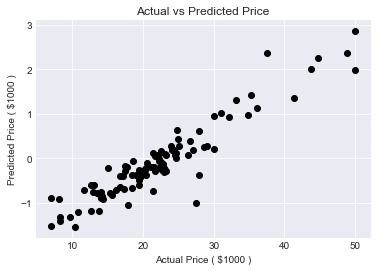

In [126]:
# Visulization between predicted and actual price

#Between y_test (actual price) and predicted price (pred4)
plt.xlabel("Actual Price ( $1000 )")
plt.ylabel("Predicted Price ( $1000 )")
plt.title("Actual vs Predicted Price")
plt.scatter(y_test, pred4, color='black')
plt.show()